In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

# Lire donnes

In [2]:
all_data = pd.read_csv("/kaggle/input/gbm-2024-competition/heart_2022.csv")
expose = pd.DataFrame(all_data)
expose.head()

,Row ID,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# Visualisation des donnes

## Construire notre y (ie. presence of heart disease s'ils ont eu angina ou crise de couer) comme -1 ou 1

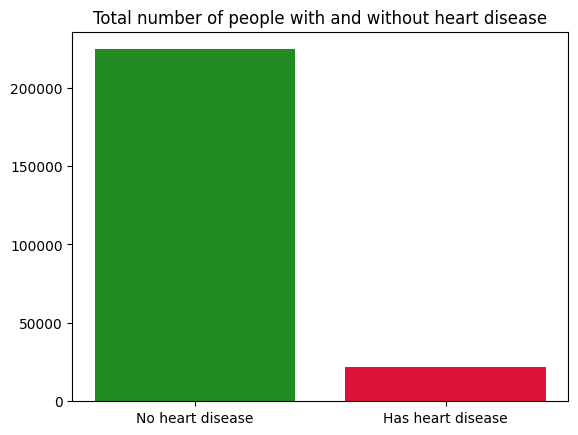

In [3]:
has_heartdisease = np.asarray([1 if x[0].lower() == "yes" or x[1].lower() == "yes" else -1 for x in zip(all_data.HadAngina, all_data.HadHeartAttack)])
axis = ['No heart disease', 'Has heart disease']
colours = ["forestgreen", "crimson"]
counts = [has_heartdisease[has_heartdisease == -1].shape[0], has_heartdisease[has_heartdisease == 1].shape[0]]

plt.title("Total number of people with and without heart disease")
plt.bar(axis, counts, color=colours)
plt.show()

## Inspecter notres donnes pour voir s'ils sont pertinent (j'ai choisi plusieurs seulement comme un exemple, mais il faut tous inspecter)

### BMI

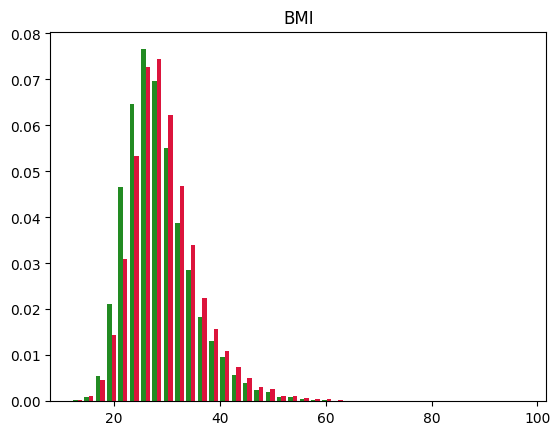

In [4]:
bmi = np.asarray([float(x) for x in all_data.BMI])

plt.title("BMI")
plt.hist((bmi[has_heartdisease == -1], bmi[has_heartdisease == 1]), color=('forestgreen', 'crimson'), density=True, bins=40)

plt.show()

### Mental and physical health days

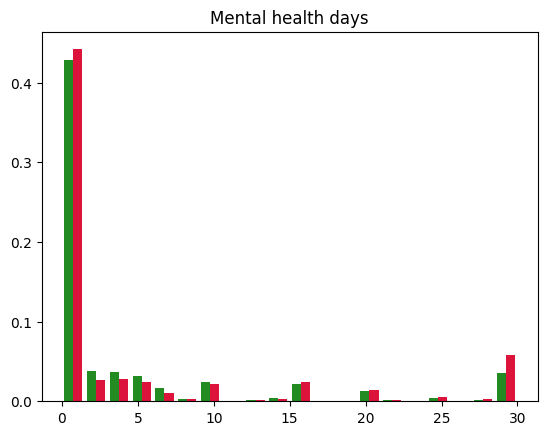

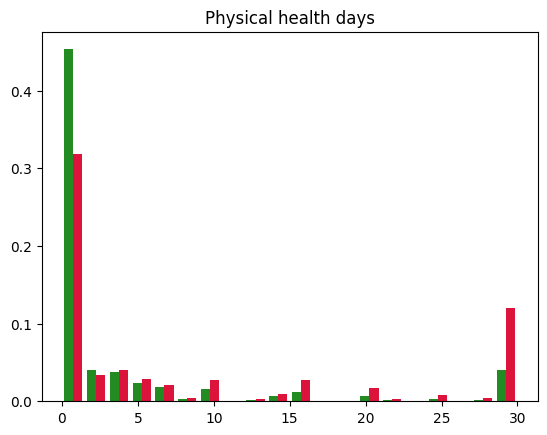

In [5]:
mental_health_days = np.asarray([float(x) for x in all_data.MentalHealthDays])
physical_health_days = np.asarray([float(x) for x in all_data.PhysicalHealthDays])

plt.title("Mental health days")
plt.hist((mental_health_days[has_heartdisease == -1], mental_health_days[has_heartdisease == 1]), color=('forestgreen', 'crimson'), density=True, bins=20)

plt.show()

plt.title("Physical health days")
plt.hist((physical_health_days[has_heartdisease == -1], physical_health_days[has_heartdisease == 1]), color=('forestgreen', 'crimson'), density=True, bins=20)

plt.show()

### Sleep Hours

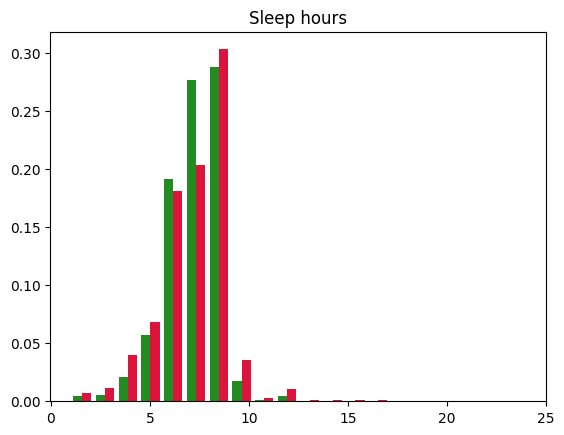

In [6]:
sleep_hours = np.asarray([float(x) for x in all_data.SleepHours])

plt.title("Sleep hours")
plt.hist((sleep_hours[has_heartdisease == -1], sleep_hours[has_heartdisease == 1]), color=('forestgreen', 'crimson'), density=True, bins=20)

plt.show()

### General Health

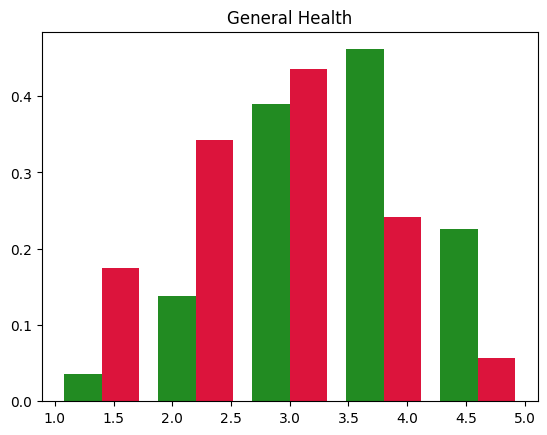

In [7]:
health_dict = {
    "excellent" : 5,
    "very good" : 4,
    "good" : 3,
    "fair" : 2,
    "poor" : 1,
}

general_health = np.asarray([health_dict[x.lower()] for x in all_data.GeneralHealth])

plt.title("General Health")
plt.hist((general_health[has_heartdisease == -1], general_health[has_heartdisease == 1]), color=('forestgreen', 'crimson'), density=True, bins=5)

plt.show()

### Age

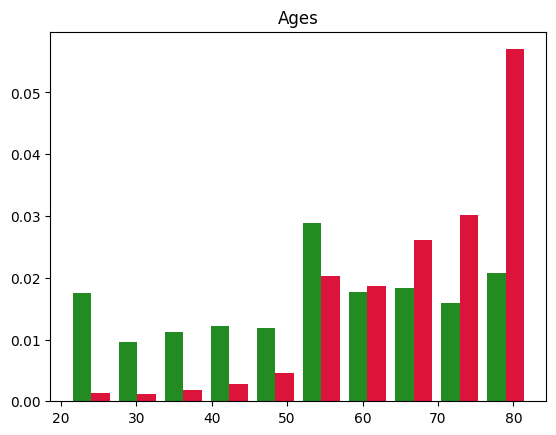

In [8]:
age_ranges = range(25, 79, 5)
age_dict = {}

for x in age_ranges:
    age_dict["age " + str(x) + " to " + str(x + 4)] = (2 * x + 4) / 2
    
age_dict["age 18 to 24"] = 21
age_dict["age 80 or older"] = 82

ages = np.asarray([age_dict[x.lower()] for x in all_data.AgeCategory])

plt.title("Ages")
plt.hist((ages[has_heartdisease == -1], ages[has_heartdisease == 1]), color=('forestgreen', 'crimson'), density=True)

plt.show()


## Inspecter la correlation entre les differents variables (si plusieurs variables sont parfaitement correle, ca veut dire qu'on peut le reduire dans 1 variable)

### Weight vs BMI

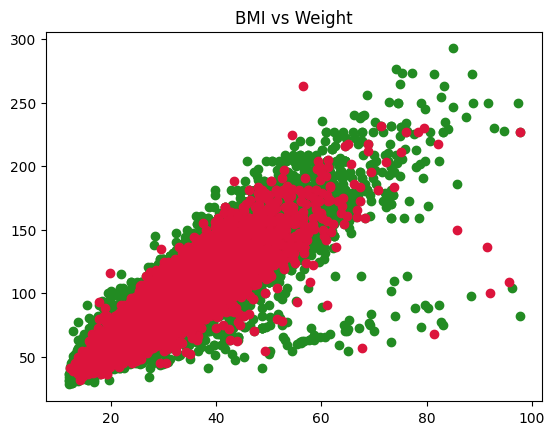

In [9]:
bmi = np.asarray([float(x) for x in all_data.BMI])
weight = np.asarray([float(x) for x in all_data.WeightInKilograms])

plt.title("BMI vs Weight")
plt.scatter(bmi[has_heartdisease == -1], weight[has_heartdisease == -1], color="forestgreen")
plt.scatter(bmi[has_heartdisease == 1], weight[has_heartdisease == 1], color="crimson")

plt.show()

### Diabetes vs Smoking habits

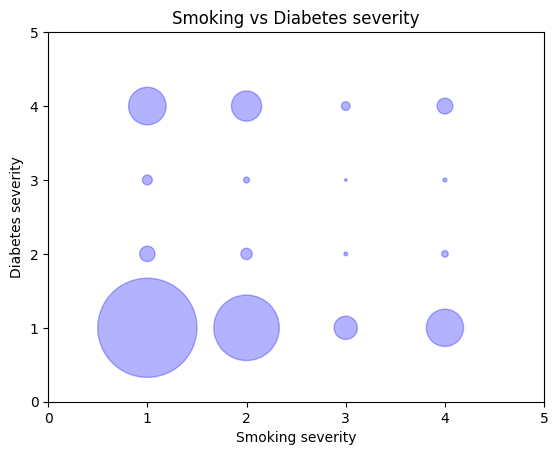

In [10]:
diabetes_dict = {
    "no" : 1,
    "no, pre-diabetes or borderline diabetes" : 2,
    "yes, but only during pregnancy (female)" : 3,
    "yes" : 4
}

smoking_dict = {
    "never smoked" : 1,
    "former smoker" : 2,
    "current smoker - now smokes some days" : 3,
    "current smoker - now smokes every day" : 4
}

smoking = np.asarray([smoking_dict[x.lower()] for x in all_data.SmokerStatus])
diabetes = np.asarray([diabetes_dict[x.lower()] for x in all_data.HadDiabetes])

vals = [1, 2, 3, 4]

points = np.asarray(np.meshgrid(vals, vals)).T.reshape(-1, 2)
data_counts = np.asarray([0] * points.shape[0])

for i, point in enumerate(points):
    #hack, not sure why multiple conditionals are not working
    smoking_temp = smoking[diabetes == point[1]]
    final = smoking_temp[smoking_temp == point[0]]
    data_counts[i] = final.shape[0]
    
total = has_heartdisease.shape[0]
data_counts = np.divide(data_counts, total)

max_size = 10000

sizes = np.multiply(data_counts, max_size)

plt.title("Smoking vs Diabetes severity")
#plt.scatter(points.T[0], points.T[1], s=sizes_nodisease, color="forestgreen", alpha=0.3)
plt.scatter(points.T[0], points.T[1], s=sizes, color="blue", alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("Smoking severity")
plt.ylabel("Diabetes severity")

plt.show()    

# Version facile (est pas bon) pour predire si quelqu'un a un maladie du coeur utilisant le regle de bayes avec que l'age

In [11]:
def make_predictions(ages, priord, priornd, marginals, conditionals_d, conditionals_nd, weight_d):
    predictions = np.zeros(has_heartdisease.shape[0])

    for i, age in enumerate(ages):
        prob_d = conditional_d[age] * priord / marginals[age]
        prob_nd = conditional_nd[age] * priornd / marginals[age]

        predictions[i] = 1 if (weight * prob_d - prob_nd) > 0 else -1
        
    return predictions


priord = has_heartdisease[has_heartdisease == 1].shape[0] / has_heartdisease.shape[0]
priornd = 1 - priord

age_ranges = range(25, 79, 5)
age_midpoints = [(2 * x + 4) / 2 for x in age_ranges]
age_midpoints.insert(0, 21)
age_midpoints.append(82)

marginals = {}

total = ages.shape[0]

#calculating and using for illustration, in practice the marginals cancel out
for age in age_midpoints:
    marginals[age] = ages[ages == age].shape[0] / total
    
conditional_d = {}
conditional_nd = {}
ages_d = ages[has_heartdisease == 1]
ages_nd = ages[has_heartdisease == -1]

for age in age_midpoints:
    conditional_d[age] = ages_d[ages_d == age].shape[0] / ages_d.shape[0]
    conditional_nd[age] = ages_nd[ages_nd == age].shape[0] / ages_nd.shape[0]

## Performance avec le jeu de donnes

In [12]:
from sklearn.metrics import f1_score, accuracy_score

#arbitrarily chose weight to provide good tradeoff between precision and recall
weight = 7
predictions = make_predictions(ages, priord, priornd, marginals, conditional_d, conditional_nd, weight)

print(f1_score(has_heartdisease, predictions))

0.27567911460021366


## Sauvgarder l'output

In [13]:
output = {
    "Row ID" : all_data['Row ID'],
    "expected" : predictions
}

output_df = df = pd.DataFrame(output)
output_df.to_csv("GBM2024_exemple.csv", index=False)